# Aircraft Purchase Proposal

## Introduction

This proposal aims to generate insights for business stakeholders in a company diversifying its portfolio into the aviation industry. The 

### Business Problem

The company would like to expand in to new industries to diversify its portfolio. Specifically, the company is interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. This proposal will aim to determine which models of aircraft are the lowest risk for the company to start this new business endeavor as well as translate findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Data
Data used for this analysis is sourced from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. This data can be found in _"AviationData.csv"_.





## Methodology
We will use data cleaning, imputation, analysis, and visualization to generate the required insights for business stakeholders. As such this section will be divided as follows:

1. Importing data 
2. Dealing with missing data
3. Dealing with unknowns and outliers in the data 
4. Analysis and visulaization 


To begin, we'll start by importing all the necessary libraries needed for this analysis. These are listed below:

- **Pandas** - This library will assist with the manipulation of data in the DataFrame
- **Numpy** - This library will enable us to compute mathematical and statistical functions.
- **Matplotlib** - This library will help us visulaize the data as part of the analysis
- **Seaborn** - An added library whihc will build upon matplotlib to generate data visualizations.


In [122]:
#import the required libraries as set below

import pandas as pd # imports pandas with an alias pd
import numpy as np  # imports numpy with an alias np
import matplotlib.pyplot as plt # imports matplotlib.pyplot with an alias plt
import seaborn as sns # imports seaborn with an alias sns

#Ensures the graphs in the notebook display immediately below the cell that creates them
%matplotlib inline  
 

Now, let's get started by reading in the data from the **'AviationData.csv'** file and storing it the DataFrame **aviation_df**. In addition, we'll preview the data.

In [123]:
aviation_df = pd.read_csv("AviationData.csv", dtype='unicode') # reads in the data and specifies the data type in case 
                                                      # there are conflicting data types in a column
aviation_df.head()                                             # Gives a preview of the top five rows of the dataframe

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16/04/1980


We will now have a look at the dimensions of the imported data (i.e.rows and columns in  **df_aviation**)

In [124]:
# Gives us the dimensions of the dataframe
aviation_df.shape

(88889, 31)

Let's now have a look at the bottom five rows of the dataframe.

In [125]:
# Gives us an overview of the bottom five rows of the data
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,91,NaN,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,NaN,91,NaN,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,91,NaN,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,91,NaN,Personal,NaN,0,1,0,1,NaN,NaN,NaN,30/12/2022


From the checks above, the dataset has been loaded successfully. The bottom row indexes are as expected (matches up with the total number of rows). Also, the structure of the bottom rows are consistent with the top five rows so no further manipulation is required on this end. Now let's look at the summary of the data set below:


In [126]:
# Gets a concise summary of the dataframe
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88837 non-null  object
 5   Country                 88663 non-null  object
 6   Latitude                34382 non-null  object
 7   Longitude               34373 non-null  object
 8   Airport.Code            50249 non-null  object
 9   Airport.Name            52790 non-null  object
 10  Injury.Severity         87889 non-null  object
 11  Aircraft.damage         85695 non-null  object
 12  Aircraft.Category       32287 non-null  object
 13  Registration.Number     87572 non-null  object
 14  Make                    88826 non-null  object
 15  Mo

From the summary above, we can see that all the columns are **string** data type. Moreover, columns such as **Latitude** and **Longitude** have a lot of missing entries. Thus, we need to generate a subset of the data that we willl use for this analysis and deal with the missing data as well as change the data types of some of the columns to fit our analysis.

Also column names are separated by full stop which might make it a bit confusing when using some of the python functions later on. Therefore, we will begin by modifying the column names and replace the full stops with underscores.

In [127]:
# Add in a code to replace the "." with "_" as the name separator in the dataframe column names

modified_aviation_df = aviation_df.rename(columns=lambda name: name.replace('.', '_'))
modified_aviation_df.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,Injury_Severity,Aircraft_damage,Aircraft_Category,Registration_Number,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,FAR_Description,Schedule,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16/04/1980


Now that the column names are clear, we can select the subset of data we are dealing with. As mentioned earlier we are only interested in the following columns for our analysis:

- Make
- Model
- Investigation_Type
- Event_Date
- Aircraft_damage
- Amateur_Built
- Number_of_Engines
- Engine_Type
- Purpose_of_flight
- Total_Fatal_Injuries
- Total_Serious_Injuries
- Total_Minor_Injuries
- Total_Uninjured



In [128]:
#subset containing only the required columns needed
required_cols = ["Make","Model","Investigation_Type","Event_Date","Aircraft_damage",
                 "Amateur_Built","Number_of_Engines","Engine_Type","Purpose_of_flight","Total_Fatal_Injuries",
                "Total_Serious_Injuries","Total_Minor_Injuries","Total_Uninjured"]

modified_aviation_df_2 = modified_aviation_df[required_cols]
modified_aviation_df_2.head()


,Make,Model,Investigation_Type,Event_Date,Aircraft_damage,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,Stinson,108-3,Accident,24/10/1948,Destroyed,No,1,Reciprocating,Personal,2,0,0,0
1,Piper,PA24-180,Accident,19/07/1962,Destroyed,No,1,Reciprocating,Personal,4,0,0,0
2,Cessna,172M,Accident,30/08/1974,Destroyed,No,1,Reciprocating,Personal,3,NaN,NaN,NaN
3,Rockwell,112,Accident,19/06/1977,Destroyed,No,1,Reciprocating,Personal,2,0,0,0
4,Cessna,501,Accident,02/08/1979,Destroyed,No,NaN,NaN,Personal,1,2,NaN,0


We can now deal with the missing data in our subset to be used in the analysis. To begin, we will have another summary look at the modified dataframe

In [129]:
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    88826 non-null  object
 1   Model                   88797 non-null  object
 2   Investigation_Type      88889 non-null  object
 3   Event_Date              88889 non-null  object
 4   Aircraft_damage         85695 non-null  object
 5   Amateur_Built           88787 non-null  object
 6   Number_of_Engines       82805 non-null  object
 7   Engine_Type             81812 non-null  object
 8   Purpose_of_flight       82697 non-null  object
 9   Total_Fatal_Injuries    77488 non-null  object
 10  Total_Serious_Injuries  76379 non-null  object
 11  Total_Minor_Injuries    76956 non-null  object
 12  Total_Uninjured         82977 non-null  object
dtypes: object(13)
memory usage: 8.8+ MB


## Dealing with missing data

Make, Model, Aircraft Damage, Amateur Built, Aircraft_damage, Purpose_of_flight and Engine_Type : Missing values in these columns as they are quite small and won't have much of an impact on the analysis.

In [130]:
modified_aviation_df_2 = modified_aviation_df_2.dropna(subset=["Make", "Model","Amateur_Built","Aircraft_damage",
                                                               "Purpose_of_flight","Engine_Type"])
modified_aviation_df_2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 77551 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    77551 non-null  object
 1   Model                   77551 non-null  object
 2   Investigation_Type      77551 non-null  object
 3   Event_Date              77551 non-null  object
 4   Aircraft_damage         77551 non-null  object
 5   Amateur_Built           77551 non-null  object
 6   Number_of_Engines       75873 non-null  object
 7   Engine_Type             77551 non-null  object
 8   Purpose_of_flight       77551 non-null  object
 9   Total_Fatal_Injuries    68036 non-null  object
 10  Total_Serious_Injuries  67123 non-null  object
 11  Total_Minor_Injuries    67853 non-null  object
 12  Total_Uninjured         72738 non-null  object
dtypes: object(13)
memory usage: 8.3+ MB


In [131]:
modified_aviation_df_2["Make"]= modified_aviation_df_2["Make"].str.strip()
modified_aviation_df_2["Make"] = modified_aviation_df_2["Make"].apply(lambda x: x.lower())
#modified_aviation_df_2["Make"].value_counts()

In [132]:
modified_aviation_df_2["Make"].value_counts()

cessna                            25274
piper                             13923
beech                              4885
bell                               2244
mooney                             1267
                                  ...  
cody hawkins                          1
mitchell/bede                         1
piaggio aero industries s.p.a.        1
vuncannon rotorway                    1
boeing-stearman                       1
Name: Make, Length: 7040, dtype: int64

In [133]:
#remove unknown
filt = modified_aviation_df_2["Aircraft_damage"] == "Unknown"
modified_aviation_df_2 = modified_aviation_df_2.drop(index = modified_aviation_df_2[filt].index)


In [134]:
modified_aviation_df_2["Engine_Type"].value_counts()

Reciprocating    68362
Turbo Shaft       3143
Turbo Prop        2767
Unknown           1782
Turbo Fan         1012
Turbo Jet          450
None                16
Electric             9
NONE                 2
UNK                  1
LR                   1
Name: Engine_Type, dtype: int64

In [135]:
modified_aviation_df_2["Engine_Type"]= modified_aviation_df_2["Engine_Type"].apply(lambda x: x.lower())
modified_aviation_df_2["Engine_Type"].value_counts()

reciprocating    68362
turbo shaft       3143
turbo prop        2767
unknown           1782
turbo fan         1012
turbo jet          450
none                18
electric             9
lr                   1
unk                  1
Name: Engine_Type, dtype: int64

In [136]:
filt_2 = (modified_aviation_df_2["Engine_Type"] == "unknown") | (modified_aviation_df_2["Engine_Type"] == "none")
modified_aviation_df_2 = modified_aviation_df_2.drop(index = modified_aviation_df_2[filt_2].index)

In [111]:
modified_aviation_df_2["Engine_Type"].value_counts()

reciprocating    68362
turbo shaft       3143
turbo prop        2767
turbo fan         1012
turbo jet          450
electric             9
lr                   1
unk                  1
Name: Engine_Type, dtype: int64

In [137]:
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75745 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Make                    75745 non-null  object
 1   Model                   75745 non-null  object
 2   Investigation_Type      75745 non-null  object
 3   Event_Date              75745 non-null  object
 4   Aircraft_damage         75745 non-null  object
 5   Amateur_Built           75745 non-null  object
 6   Number_of_Engines       75171 non-null  object
 7   Engine_Type             75745 non-null  object
 8   Purpose_of_flight       75745 non-null  object
 9   Total_Fatal_Injuries    66347 non-null  object
 10  Total_Serious_Injuries  65463 non-null  object
 11  Total_Minor_Injuries    66188 non-null  object
 12  Total_Uninjured         71042 non-null  object
dtypes: object(13)
memory usage: 8.1+ MB


In [151]:
#modified_aviation_df_2["Total_Fatal_Injuries"]
modified_aviation_df_2['Total_Fatal_Injuries']=pd.to_numeric(modified_aviation_df_2["Total_Fatal_Injuries"], errors='coerce') 
modified_aviation_df_2['Total_Serious_Injuries']=pd.to_numeric(modified_aviation_df_2["Total_Serious_Injuries"], errors='coerce') 
modified_aviation_df_2['Total_Minor_Injuries']=pd.to_numeric(modified_aviation_df_2["Total_Minor_Injuries"], errors='coerce') 
modified_aviation_df_2['Total_Uninjured']=pd.to_numeric(modified_aviation_df_2["Total_Uninjured"], errors='coerce') 
modified_aviation_df_2['Number_of_Engines']=pd.to_numeric(modified_aviation_df_2["Number_of_Engines"], errors='coerce')

#app_metadata_df.dropna(subset=['item_id'], inplace=True)
#app_metadata_df


In [152]:
modified_aviation_df_2["Event_Date"] = pd.to_datetime(modified_aviation_df_2["Event_Date"])

In [163]:
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75745 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    75745 non-null  object        
 1   Model                   75745 non-null  object        
 2   Investigation_Type      75745 non-null  object        
 3   Event_Date              75745 non-null  datetime64[ns]
 4   Aircraft_damage         75745 non-null  object        
 5   Amateur_Built           75745 non-null  object        
 6   Number_of_Engines       75171 non-null  float64       
 7   Engine_Type             75745 non-null  object        
 8   Purpose_of_flight       75745 non-null  object        
 9   Total_Fatal_Injuries    66347 non-null  float64       
 10  Total_Serious_Injuries  65463 non-null  float64       
 11  Total_Minor_Injuries    66188 non-null  float64       
 12  Total_Uninjured         71042 non-null  float6

In [164]:
modified_aviation_df_2.isna().sum()

Make                          0
Model                         0
Investigation_Type            0
Event_Date                    0
Aircraft_damage               0
Amateur_Built                 0
Number_of_Engines           574
Engine_Type                   0
Purpose_of_flight             0
Total_Fatal_Injuries       9398
Total_Serious_Injuries    10282
Total_Minor_Injuries       9557
Total_Uninjured            4703
dtype: int64

Check for outliers 

In [167]:
modified_aviation_df_3 = modified_aviation_df_2[["Number_of_Engines","Total_Fatal_Injuries","Total_Serious_Injuries",
                                               "Total_Minor_Injuries","Total_Uninjured"]]

modified_aviation_df_3.head()



,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
0,1.0,2.0,0.0,0.0,0.0
1,1.0,4.0,0.0,0.0,0.0
2,1.0,3.0,NaN,NaN,NaN
3,1.0,2.0,0.0,0.0,0.0
6,1.0,4.0,0.0,0.0,0.0


In [177]:
modified_aviation_df_3 = modified_aviation_df_3.dropna()

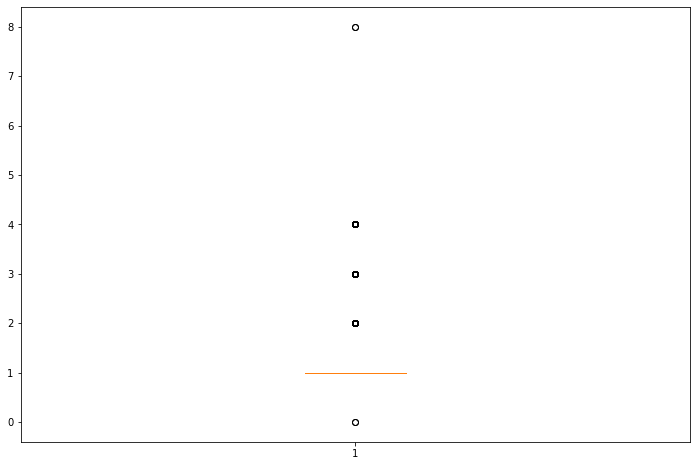

In [178]:
fig, ax = plt.subplots(figsize = (12,8))

ax.boxplot(modified_aviation_df_3["Number_of_Engines"]);


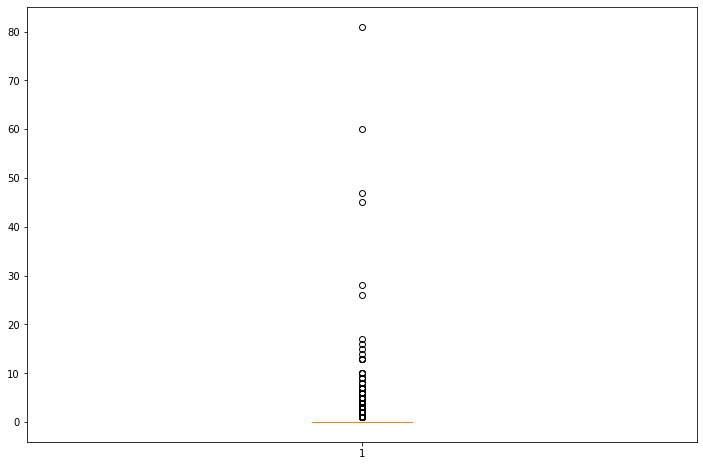

In [179]:
fig, ax = plt.subplots(figsize = (12,8))

ax.boxplot(modified_aviation_df_3["Total_Serious_Injuries"]);

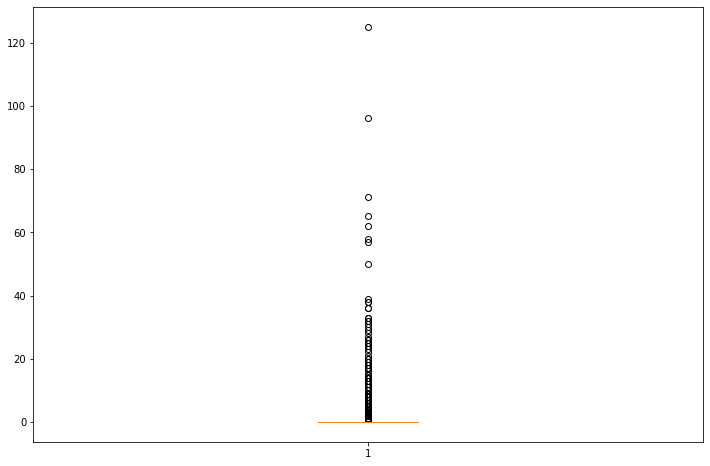

In [180]:
fig, ax = plt.subplots(figsize = (12,8))

ax.boxplot(modified_aviation_df_3["Total_Minor_Injuries"]);

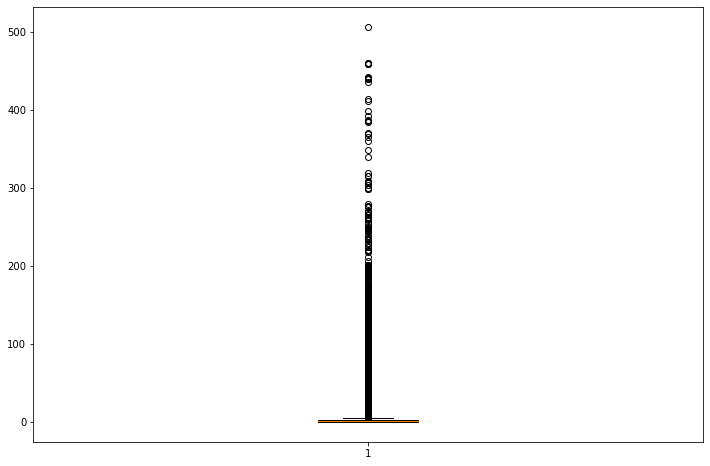

In [181]:
fig, ax = plt.subplots(figsize = (12,8))

ax.boxplot(modified_aviation_df_3["Total_Uninjured"]);

Go back to the modified v 2 and fill na with median

In [182]:
#fill na with median of the values:

modified_aviation_df_2['Number_of_Engines']=modified_aviation_df_2["Number_of_Engines"].fillna(modified_aviation_df_2["Number_of_Engines"].median())
modified_aviation_df_2['Total_Fatal_Injuries']=modified_aviation_df_2["Total_Fatal_Injuries"].fillna(modified_aviation_df_2["Total_Fatal_Injuries"].median())
modified_aviation_df_2['Total_Serious_Injuries']=modified_aviation_df_2["Total_Serious_Injuries"].fillna(modified_aviation_df_2["Total_Serious_Injuries"].median())
modified_aviation_df_2['Total_Minor_Injuries']=modified_aviation_df_2["Total_Minor_Injuries"].fillna(modified_aviation_df_2["Total_Minor_Injuries"].median())
modified_aviation_df_2['Total_Uninjured']=modified_aviation_df_2["Total_Uninjured"].fillna(modified_aviation_df_2["Total_Uninjured"].median())



In [183]:
modified_aviation_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75745 entries, 0 to 88767
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Make                    75745 non-null  object        
 1   Model                   75745 non-null  object        
 2   Investigation_Type      75745 non-null  object        
 3   Event_Date              75745 non-null  datetime64[ns]
 4   Aircraft_damage         75745 non-null  object        
 5   Amateur_Built           75745 non-null  object        
 6   Number_of_Engines       75745 non-null  float64       
 7   Engine_Type             75745 non-null  object        
 8   Purpose_of_flight       75745 non-null  object        
 9   Total_Fatal_Injuries    75745 non-null  float64       
 10  Total_Serious_Injuries  75745 non-null  float64       
 11  Total_Minor_Injuries    75745 non-null  float64       
 12  Total_Uninjured         75745 non-null  float6

Data is all set now to start the analysis

''

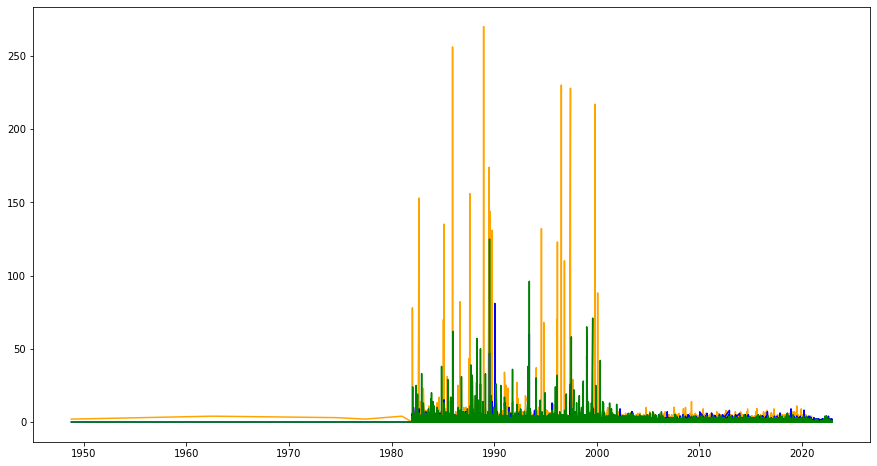

In [195]:
fig,ax  =plt.subplots(figsize = (15,8))


ax.plot(modified_aviation_df_2.Event_Date,modified_aviation_df_2.Total_Fatal_Injuries, color='orange', label='Total Fatal Injuries')
ax.plot(modified_aviation_df_2.Event_Date,modified_aviation_df_2.Total_Serious_Injuries, color='blue', label='Total Serious Injuries')
ax.plot(modified_aviation_df_2.Event_Date,modified_aviation_df_2.Total_Minor_Injuries, label='Total Minor Injuries', color='green')
#ax.plot(modified_aviation_df_2.Event_Date,modified_aviation_df_2.Total_Uninjured, label='Total  Injuries', color='yellow')
;

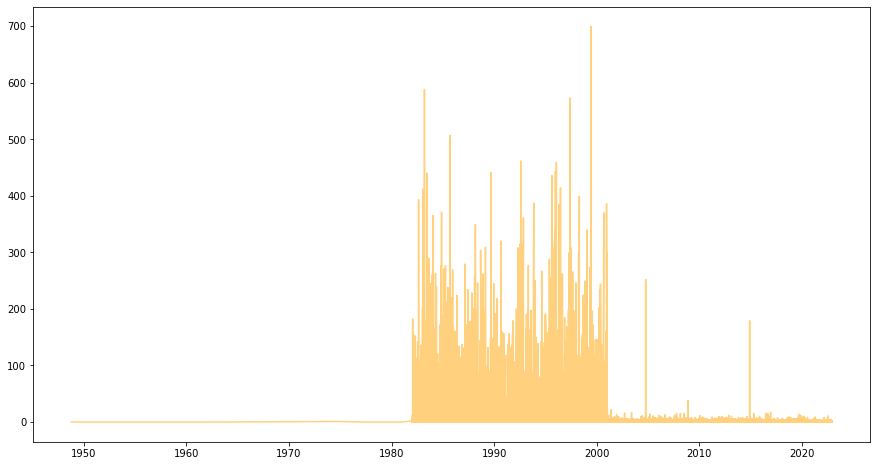

In [198]:
fig,ax  =plt.subplots(figsize = (15,8))


ax.plot(modified_aviation_df_2.Event_Date,modified_aviation_df_2.Total_Uninjured, color='orange', label='Total Uninjured',alpha = 0.5);

In [199]:
filt_4 = modified_aviation_df_2["Event_Date"]


TypeError: Invalid comparison between dtype=datetime64[ns] and float